In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import QuantileTransformer


# READ DF + NORMALIZE

In [3]:
df = pd.read_csv("NSE_BANKING_SECTOR.csv")
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-24,DHANBANK,EQ,14.30,14.40,14.70,14.35,14.55,14.55,14.52,1020364,1.481694e+12,1323,745223,0.7304
41227,2021-05-25,DHANBANK,EQ,14.55,14.60,17.45,14.40,16.55,16.60,16.67,16401581,2.734927e+13,15379,4777890,0.2913
41228,2021-05-26,DHANBANK,EQ,16.60,16.75,16.75,15.80,15.95,15.95,16.06,2267386,3.642436e+12,4812,1223263,0.5395
41229,2021-05-27,DHANBANK,EQ,15.95,15.95,16.10,15.35,15.75,15.60,15.74,1411225,2.221628e+12,2820,904246,0.6408


In [4]:
df = df.select_dtypes(include=['float', 'int'])
df

,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586
...,...,...,...,...,...,...,...,...,...,...,...,...
41226,14.30,14.40,14.70,14.35,14.55,14.55,14.52,1020364,1.481694e+12,1323,745223,0.7304
41227,14.55,14.60,17.45,14.40,16.55,16.60,16.67,16401581,2.734927e+13,15379,4777890,0.2913
41228,16.60,16.75,16.75,15.80,15.95,15.95,16.06,2267386,3.642436e+12,4812,1223263,0.5395
41229,15.95,15.95,16.10,15.35,15.75,15.60,15.74,1411225,2.221628e+12,2820,904246,0.6408


In [5]:
quantile_trans = QuantileTransformer(n_quantiles=1000, output_distribution='normal')
df_scaled = pd.DataFrame(quantile_trans.fit_transform(df), columns=df.columns)
df_scaled

,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,1.506257,1.503920,1.495560,1.509652,1.501428,1.501559,1.502091,-0.785188,0.312588,-0.213304,-0.759174,0.169902
1,1.501936,1.494502,1.483763,1.476996,1.465973,1.465359,1.476559,-0.175324,0.760115,0.819750,0.212022,1.300029
2,1.465455,1.476005,1.466271,1.471283,1.458590,1.459549,1.467831,-0.091796,0.834560,1.078778,0.327336,1.444915
3,1.459602,1.459652,1.455302,1.467404,1.458270,1.459494,1.459902,-0.006826,0.923653,0.972220,0.441531,1.578222
4,1.459548,1.453275,1.445856,1.451375,1.439978,1.443413,1.446956,-0.241732,0.690269,0.647754,0.122345,1.172738
...,...,...,...,...,...,...,...,...,...,...,...,...
41226,-1.490335,-1.490335,-1.490335,-1.460531,-1.467860,-1.467860,-1.475269,-0.550392,-1.156389,-1.376386,-0.153636,1.588771
41227,-1.467860,-1.471555,-1.301191,-1.453280,-1.323952,-1.320274,-1.319462,1.017665,-0.134644,-0.127035,0.996950,-0.502769
41228,-1.321946,-1.317949,-1.337127,-1.349498,-1.362078,-1.358913,-1.355710,-0.105778,-0.835002,-0.727233,0.146763,0.555023
41229,-1.362078,-1.367384,-1.374878,-1.378114,-1.373803,-1.378114,-1.376410,-0.370311,-1.011341,-0.980649,-0.034055,1.074800


# K-MEANS-LTS

In [6]:
# Return K_MEANS dengan cluster_id dan distance to centroid
def cluster_maker(dataframe, n_cluster_lts):
    kmeans = KMeans(n_clusters=n_cluster_lts, init='k-means++', random_state=42).fit(dataframe)

    dataframe['distance_to_centroid'] = np.min(kmeans.transform(dataframe), axis=1)
    dataframe['cluster_id'] = kmeans.labels_

    return dataframe

In [7]:
# Memisahkan dataframe & mengurutkan berdasarkan distance
def separate_dataframe(dataframe, n_cluster_lts, sort_column='distance_to_centroid'):
    cluster_dfs = {}

    for i in range(n_cluster_lts):
        cluster_dfs[i] = [dataframe[dataframe['cluster_id'] == i]]
        cluster_dfs[i][0] = cluster_dfs[i][0].sort_values(sort_column, ascending=False)
        
    return cluster_dfs

In [8]:
def KMeans_LTS(df, n_cluster_lts, n_percent):
    clustered_df = cluster_maker(df, n_cluster_lts)
    cluster_dict = separate_dataframe(clustered_df, n_cluster_lts)
    inliers_dfs = []
    outliers_dfs = []

    for cluster_id, df_list in cluster_dict.items():
        # Mengurutkan DataFrame berdasarkan distance_to_centroid secara descending
        sorted_df = df_list[0].sort_values(by='distance_to_centroid', ascending=False)

        # Menghitung jumlah baris yang akan di-trim
        n_rows_to_trim = int(n_percent / 100 * len(sorted_df))

        # Memisahkan inliers dan outliers
        inliers_df = sorted_df.iloc[n_rows_to_trim:]
        outliers_df = sorted_df.iloc[:n_rows_to_trim]

        # Menambahkan cluster_id-out ke outliers
        outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'

        # Menyimpan DataFrame inliers dan outliers
        inliers_dfs.append(inliers_df)
        outliers_dfs.append(outliers_df)

    # Menggabungkan DataFrame inliers dari semua cluster sesuai dengan index awal
    inliers_result = pd.concat(inliers_dfs).drop(columns=['distance_to_centroid']).sort_index()

    # Menggabungkan DataFrame outliers dari semua cluster
    outliers_result = pd.concat(outliers_dfs).drop(columns=['distance_to_centroid']).sort_index()

    # Return hasil clustering inliers+outliers sesuai dengan index awal
    optimal_cluster = pd.concat([inliers_result, outliers_result], axis=0).sort_index()

    return inliers_result, optimal_cluster

# TEST K-MEANS LTS ALGORITHM with K = 2 and n_percentage = 10

C:\Users\Asus\AppData\Local\Temp\ipykernel_9372\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


<Figure size 800x800 with 0 Axes>

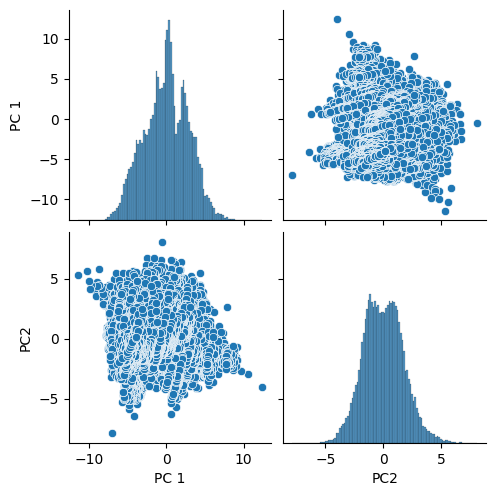

<Figure size 800x800 with 0 Axes>

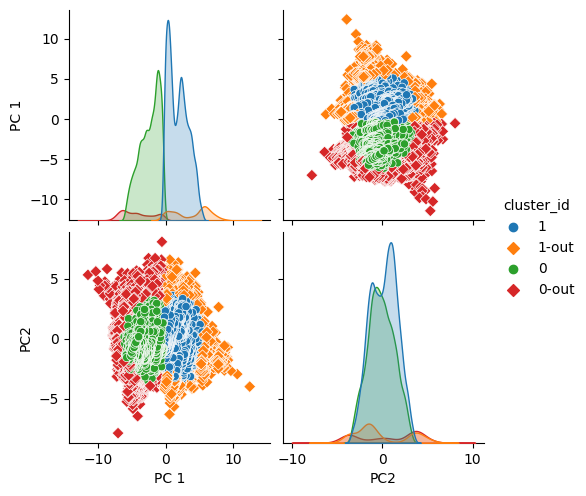

<Figure size 800x800 with 0 Axes>

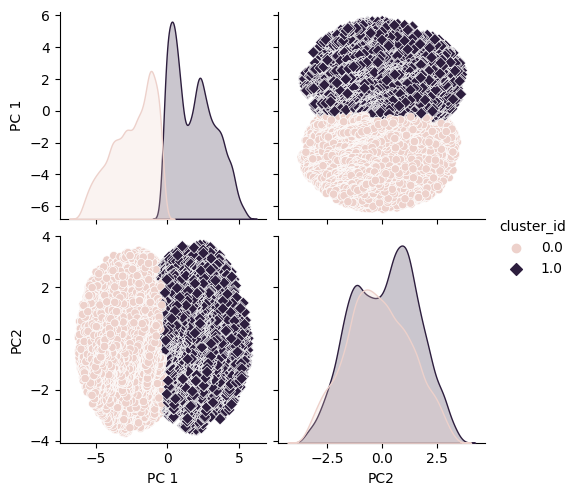

In [9]:
# TEST VISUALIZATION
from sklearn.decomposition import PCA
import seaborn as sns 

# PCA variable input
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC 1', 'PC2'])
plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca)

# GET inliers (LTS_result_filtered) and optimal cluster (LTS_result)
test_df = df_scaled.copy()
LTS_result_filtered, LTS_result = KMeans_LTS(test_df, 2, 10)

# PAIR PLOT with OUTLIERS
df_pca['cluster_id'] = LTS_result.loc[:, LTS_result.columns.isin(['cluster_id'])]

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster_id', markers=["o", "D"])

#PAIR PLOT without OUTLIERS
df_pca['cluster_id'] = LTS_result_filtered.loc[:, LTS_result_filtered.columns.isin(['cluster_id'])]

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster_id', markers=["o", "D"])

In [10]:
# FIND SILHOUETTE SCORE
from sklearn.metrics import silhouette_score

inliers_no_id = LTS_result_filtered.drop(['cluster_id'], axis=1)
score = silhouette_score(inliers_no_id, LTS_result_filtered['cluster_id'])
print(score)

0.377992689368739


In [11]:
# FIND SILHOUETTE SCORE untuk HASIL CLUSTER dari INLIERS saja
inliers_cluster = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(inliers_no_id)
score = silhouette_score(inliers_no_id, inliers_cluster.labels_)
print(score)

0.37911759639279785


# K and PERCENTAGE OPTIMIZATIONS

In [12]:
def best_percentage(dataframe, n_cluster_lts):
    best_silhouette_score = 0
    best_percent = 0
    best_inliers = None
    best_cluster = None

    for percent in range(5, 35, 5):
        print("PERCENT:", percent)
        inliers, optimal_cluster = KMeans_LTS(dataframe, n_cluster_lts=n_cluster_lts, n_percent=percent)

        score = silhouette_score(inliers.iloc[:, :-1], inliers['cluster_id'])
        print("Score:", score)

        if score > best_silhouette_score:
            best_silhouette_score = score
            best_percent = percent
            best_inliers = inliers
            best_cluster = optimal_cluster
    
    print("====================================================")
    print("Best Silhouette Score:", best_silhouette_score)
    print("Best Percent:", best_percent)

    return best_inliers, best_cluster

test_df = df_scaled.copy()
best_inliers, best_cluster = best_percentage(test_df, 2)

PERCENT: 5


C:\Users\Asus\AppData\Local\Temp\ipykernel_9372\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


Score: 0.37163360534538153
PERCENT: 10


C:\Users\Asus\AppData\Local\Temp\ipykernel_9372\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


Score: 0.3779623999635719
PERCENT: 15


C:\Users\Asus\AppData\Local\Temp\ipykernel_9372\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


Score: 0.38766302870531993
PERCENT: 20


C:\Users\Asus\AppData\Local\Temp\ipykernel_9372\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


Score: 0.3987171850523886
PERCENT: 25


C:\Users\Asus\AppData\Local\Temp\ipykernel_9372\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


Score: 0.4111951214252002
PERCENT: 30


C:\Users\Asus\AppData\Local\Temp\ipykernel_9372\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


Score: 0.42279496587319265
Best Silhouette Score: 0.42279496587319265
Best Percent: 30


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


<Figure size 800x800 with 0 Axes>

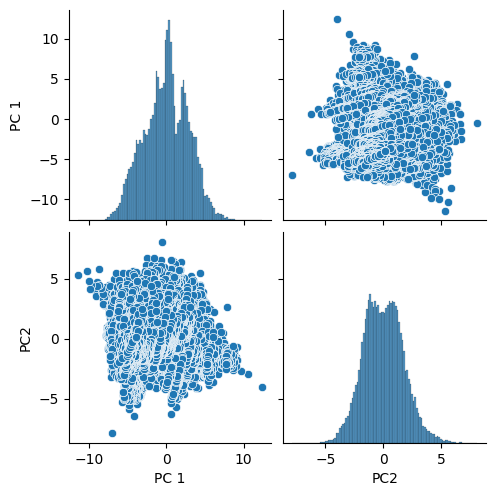

<Figure size 800x800 with 0 Axes>

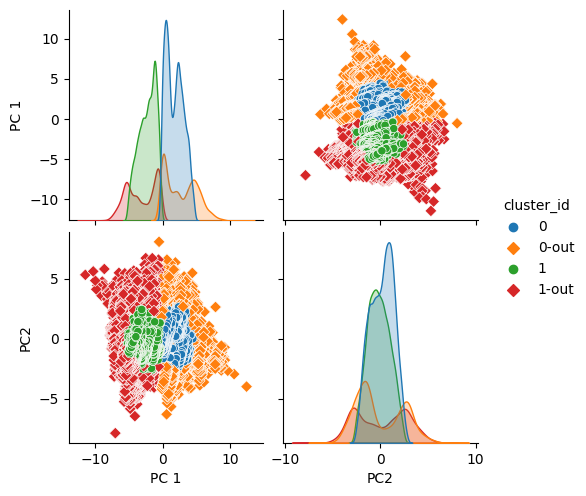

<Figure size 800x800 with 0 Axes>

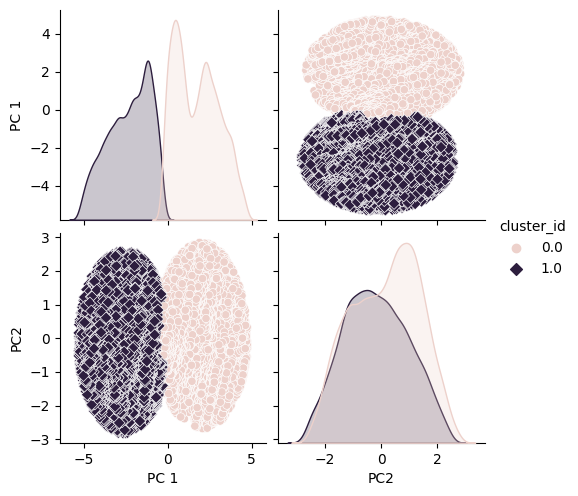

In [13]:
# OPTIMAL VISUALIZATION
from sklearn.decomposition import PCA
import seaborn as sns 

# PCA variable input
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC 1', 'PC2'])
plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca)

# PAIR PLOT OPTIMAL with OUTLIERS
df_pca['cluster_id'] = best_cluster.loc[:, best_cluster.columns.isin(['cluster_id'])]

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster_id', markers=["o", "D"])

#PAIR PLOT OPTIMAL without OUTLIERS
df_pca['cluster_id'] = best_inliers.loc[:, best_inliers.columns.isin(['cluster_id'])]

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster_id', markers=["o", "D"])